# Homework 3: Tables and Charts
Reading: Textbook chapters [6](https://www.inferentialthinking.com/chapters/06/Tables.html) and [7](https://www.inferentialthinking.com/chapters/07/Visualization.html).

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to prepare your notebook. Each time you start your server, you will need to execute this cell again.

In [1]:
# prepare notebook
import numpy as np
from datascience import *
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


## 1. Unemployment


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below we've loaded data on unemployment in the United States.  There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 1.** The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`.

In [7]:
unemployment = Table.read_table('unemployment.csv')
unemployment.show()

Date,NEI,NEI-PTER
1994-01-01,10.0974,11.172
1994-04-01,9.6239,10.7883
1994-07-01,9.3276,10.4831
1994-10-01,9.1071,10.2361
1995-01-01,8.9693,10.1832
1995-04-01,9.0314,10.1071
1995-07-01,8.9802,10.1084
1995-10-01,8.9932,10.1046
1996-01-01,9.0002,10.0531
1996-04-01,8.9038,9.9782


**Question 2.** Sort the data in decreasing order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in decreasing order by NEI-PTER instead.

In [13]:
by_nei= unemployment.sort("NEI", descending=True)
by_nei_pter= unemployment.sort("NEI-PTER", descending=True)
by_nei

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


**Question 3.** Use `take` to make a table containing the data for the 10 quarters when NEI was greatest.  Call that table `greatest_nei`.

In [12]:
greatest_nei = by_nei.take(np.arange(10))
greatest_nei

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


**Question 4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.

In [15]:
pter = unemployment.column("NEI-PTER")-unemployment.column("NEI")
pter

array([1.0746, 1.1644, 1.1555, 1.129 , 1.2139, 1.0757, 1.1282, 1.1114,
       1.0529, 1.0744, 1.1004, 1.0747, 1.0705, 1.0455, 1.008 , 0.9734,
       0.9753, 0.8931, 0.9451, 0.8367, 0.8208, 0.8105, 0.8248, 0.7578,
       0.7251, 0.7445, 0.7543, 0.7423, 0.7399, 0.7687, 0.8418, 0.9923,
       0.9181, 0.9629, 0.9703, 0.9575, 1.0333, 1.0781, 1.0675, 1.0354,
       1.0601, 1.01  , 1.0042, 1.0368, 0.9704, 0.923 , 0.9759, 0.93  ,
       0.889 , 0.821 , 0.9409, 0.955 , 0.898 , 0.8948, 0.9523, 0.9579,
       1.0149, 1.0762, 1.2873, 1.4335, 1.7446, 1.8415, 1.9315, 1.8859,
       1.8257, 1.9067, 1.8376, 1.8473, 1.7993, 1.8061, 1.7651, 1.7927,
       1.7286, 1.6387, 1.6808, 1.6805, 1.6629, 1.6253, 1.6477, 1.6298,
       1.4796, 1.5131, 1.4866, 1.4345, 1.3675, 1.3097, 1.2319, 1.1735,
       1.1844, 1.1746])

**Question 5.** Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in decreasing order.  Call the table `by_pter`.

Try to do this with a single line of code, if you can.

In [22]:
by_pter = unemployment.with_column("PTER", pter).sort("PTER", descending=True)
by_pter.show()

Date,NEI,NEI-PTER,PTER
2009-07-01,10.8089,12.7404,1.9315
2010-04-01,10.6597,12.5664,1.9067
2009-10-01,10.9698,12.8557,1.8859
2010-10-01,10.5856,12.4329,1.8473
2009-04-01,10.7082,12.5497,1.8415
2010-07-01,10.5521,12.3897,1.8376
2010-01-01,10.9054,12.7311,1.8257
2011-04-01,10.4409,12.247,1.8061
2011-01-01,10.5024,12.3017,1.7993
2011-10-01,10.3287,12.1214,1.7927


**Question 6.** Does it seem true that the PTER rate was very high during the Great Recession, compared to other periods in the dataset? Justify your answer by referring to specific values in the table or by generating a chart.

It seems that the years which have a highest PTER rate are 2009 and 2010. we can say that the PTER rate was very high during the Great Recession. The impact of the crisis may have started in 2008 and continued until 2009 and 2010.

## 2. Birth Rates


The following table gives census-based population estimates for each state on July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. *For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.*

In [48]:
# Don't change this cell; just run it.
# From http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv
# See http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf
#     for column descriptions. (As of Feb 2017, no descriptions were posted for 2010-2016.)
pop = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled(2, '2015').relabeled(3, '2016')
pop = pop.relabeled(4, 'BIRTHS').relabeled(5, 'DEATHS')
pop = pop.relabeled(6, 'MIGRATION').relabeled(7, 'OTHER')
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"4,853,875","4,863,300","58,556","52,405","3,874",-600
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2
4,Arizona,"6,817,565","6,931,071","87,204","56,564","76,405","6,461"
3,Arkansas,"2,977,853","2,988,248","37,936","30,581","3,530",-490
4,California,"38,993,940","39,250,017","502,848","273,850","33,530","-6,451"


In [46]:
pop_original = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40)
pop_original.show(1)

SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,DEATHS2016,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,NATURALINC2016,INTERNATIONALMIG2010,INTERNATIONALMIG2011,INTERNATIONALMIG2012,INTERNATIONALMIG2013,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,DOMESTICMIG2010,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016,NETMIG2010,NETMIG2011,NETMIG2012,NETMIG2013,NETMIG2014,NETMIG2015,NETMIG2016,RESIDUAL2010,RESIDUAL2011,RESIDUAL2012,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,RESIDUAL2016,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RBIRTH2016,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RDEATH2016,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016
40,3,6,1,Alabama,4779736,4780131,4785492,4799918,4815960,4829479,4843214,4853875,4863300,5361,14426,16042,13519,13735,10661,9425,14231,59689,59066,57939,58906,59034,58556,11086,48817,48372,50845,49693,51407,52405,3145,10872,10694,7094,9213,7627,6151,1360,4816,4695,4179,4732,5110,4738,866,-1416,414,1619,420,-3114,-864,2226,3400,5109,5798,5152,1996,3874,-10,154,239,627,-630,1038,-600,12.4541,12.2851,12.0138,12.1799,12.1756,12.0521,10.1857,10.0609,10.5428,10.2749,10.6026,10.7861,2.26845,2.22424,1.47095,1.90495,1.57305,1.26601,1.00486,0.97651,0.866524,0.978425,1.05392,0.975181,-0.295449,0.0861076,0.335703,0.0868424,-0.642255,-0.177829,0.709411,1.06262,1.20223,1.06527,0.41167,0.797351


**Question 1.** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the number of births in that period as a proportion of the population at the start of the period.

In [49]:
us_birth_rate = sum(pop.column("BIRTHS"))/ sum(pop.column("2015"))
us_birth_rate
#2015-2016 arası doğum sayısı / 2015 nüfusu

0.012358536498646102

**Question 2.** Assign `fastest_growth` to an array of the names of the five states with the fastest population growth rates in *descending order of growth rate*.

In [73]:
fastest_growth = pop.with_column("GROWTH RATE",((pop.column("2016") - pop.column("2015"))/pop.column("2015"))*100).sort("GROWTH RATE", descending=True).select(1).take(np.arange(5)).column(0)
fastest_growth


array(['Utah', 'Nevada', 'Idaho', 'Florida', 'Washington'], dtype='<U20')

**Question 3.** Assign `movers` to the number of states for which the absolute annual rate of migration was higher than 1%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state.

In [91]:
movers_array = pop.with_column("MIGRATION_RATE",abs(pop.column("MIGRATION")/pop.column("2015"))*100).where("MIGRATION_RATE", are.above(0.01)).column("MIGRATION_RATE")
movers=len(movers_array)
movers

51

**Question 4.** Assign `west_births` to the total number of births that occurred in region 4 (the Western US).

In [107]:
west_births = sum(pop.where("REGION", "4").column("BIRTHS"))
west_births

979657

**Question 5.** Assign `less_than_west_births` to the number of states that had a total population in 2016 that was smaller than the *number of babies born in region 4 (the Western US)* during this time interval.

In [111]:
less_than_west_births = len(pop.where("2016", are.below(west_births)).column(0))
less_than_west_births

7

**Question 6.** Was there an association between birth rate and death rate during this time interval? Use the code cell below to support your conclusion with a chart. If an association exists, what might explain it?

as we can see in the scatter diagram there is a slight negative correlation. Locations with low death rate may be more socio-economically developed thats why people here may also be more likely to give birth.

In [146]:
test_rate=pop.with_columns("BIRTH_RATE",(pop.column("BIRTHS")/pop.column("2015"))*100,"DEATH_RATE", (pop.column("DEATHS")/pop.column("2015"))*100)
test_rate

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER,BIRTH_RATE,DEATH_RATE
3,Alabama,"4,853,875","4,863,300","58,556","52,405","3,874",-600,1.20638,1.07965
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2,1.52567,0.611488
4,Arizona,"6,817,565","6,931,071","87,204","56,564","76,405","6,461",1.27911,0.82968
3,Arkansas,"2,977,853","2,988,248","37,936","30,581","3,530",-490,1.27394,1.02695
4,California,"38,993,940","39,250,017","502,848","273,850","33,530","-6,451",1.28955,0.702289
4,Colorado,"5,448,819","5,540,545","67,453","37,121","60,773",621,1.23794,0.681267
1,Connecticut,"3,584,730","3,576,452","35,848","30,638","-12,822",-666,1.00002,0.854681
3,Delaware,"944,076","952,065","10,922","8,945","5,583",429,1.1569,0.947487
3,District of Columbia,"670,377","681,170","9,779","5,455","6,392",77,1.45873,0.813721
3,Florida,"20,244,914","20,612,439","222,793","201,485","325,986","20,231",1.10049,0.995238


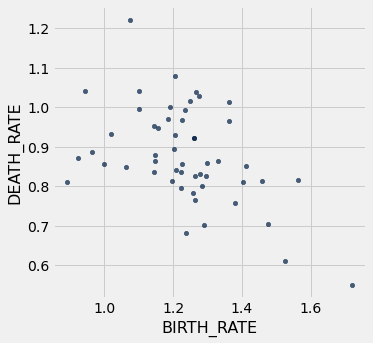

In [147]:
tt=test_rate.scatter(8,9)


## 3. Consumer Financial Protection Bureau Complaints


The Consumer Financial Protection Bureau has collected and published consumer complaints against financial companies since 2011.  The data are available [here](https://dev.socrata.com/foundry/data.consumerfinance.gov/jhzv-w97w) (or at this [direct link](https://data.consumerfinance.gov/resource/jhzv-w97w.csv).  For this exercise, to make your code run faster, we've selected only the data from May 2016.

Run the next cell to load the data.  Each row represents one consumer's complaint.

In [2]:
# Just run this cell.
complaints = Table.read_table("complaints.csv")
complaints

company,company_public_response,company_response,complaint_id,complaint_what_happened,consumer_consent_provided,consumer_disputed,date_received,date_sent_to_company,issue,product,state,sub_issue,sub_product,submitted_via,tags,timely,zip_code
"TransUnion Intermediate Holdings, Inc.",Company has responded to the consumer and the CFPB and c ...,Closed with explanation,1920073,(None),(None),Yes,2016-05-11T15:39:07.000,2016-05-11T15:39:07.000,Credit reporting company's investigation,Credit reporting,VT,Inadequate help over the phone,(None),Phone,(None),Yes,05035
"TransUnion Intermediate Holdings, Inc.",Company has responded to the consumer and the CFPB and c ...,Closed with explanation,1914777,(None),Consent not provided,No,2016-05-08T00:53:47.000,2016-05-12T18:40:34.000,Incorrect information on credit report,Credit reporting,MO,Information is not mine,(None),Web,(None),Yes,63020
Bank of America,Company has responded to the consumer and the CFPB and c ...,Closed with explanation,1907306,I became aware of several charges on a Bank of America c ...,Consent provided,No,2016-05-03T16:49:33.000,2016-05-03T16:49:34.000,Other,Credit card,VA,(None),(None),Web,(None),Yes,239XX
Finance of America Reverse LLC,Company believes it acted appropriately as authorized by ...,Closed with explanation,1919055,I applied for a reverse mortgage and everthing was going ...,Consent provided,No,2016-05-10T20:13:22.000,2016-05-10T20:13:23.000,"Application, originator, mortgage broker",Mortgage,TX,(None),Reverse mortgage,Web,Older American,Yes,774XX
"Acceptance Solutions Group, INC",Company believes it acted appropriately as authorized by ...,Closed with explanation,1908628,Keeps calling numbers that are not mine. And talking to ...,Consent provided,No,2016-05-03T21:05:42.000,2016-05-06T13:42:45.000,Improper contact or sharing of info,Debt collection,OH,Talked to a third party about my debt,Payday loan,Web,(None),Yes,430XX
Equifax,(None),Closed with explanation,1909176,(None),(None),No,2016-05-04T20:08:06.000,2016-05-09T15:11:00.000,Incorrect information on credit report,Credit reporting,NC,Information is not mine,(None),Postal mail,(None),Yes,28052
"TransUnion Intermediate Holdings, Inc.",Company has responded to the consumer and the CFPB and c ...,Closed with explanation,1914477,When I enter my personal information to receive my credi ...,Consent provided,No,2016-05-06T23:09:50.000,2016-05-08T22:40:19.000,Unable to get credit report/credit score,Credit reporting,OH,Problem getting my free annual report,(None),Web,(None),Yes,450XX
Encore Capital Group,(None),Closed with non-monetary relief,1919937,(None),Consent not provided,(None),2016-05-11T18:58:25.000,2016-05-11T21:53:54.000,Cont'd attempts collect debt not owed,Debt collection,CT,Debt is not mine,Credit card,Web,Older American,Yes,06801
Nationstar Mortgage,(None),Closed with explanation,1920517,I am livid with Nation Star for refusing to work with me ...,Consent provided,(None),2016-05-11T20:38:09.000,2016-05-11T20:38:09.000,"Application, originator, mortgage broker",Mortgage,IL,(None),Conventional adjustable mortgage (ARM),Web,(None),Yes,606XX
"Convergent Resources, Inc.",(None),Closed with explanation,1920464,(None),Consent not provided,No,2016-05-11T12:16:31.000,2016-05-11T12:16:32.000,Cont'd attempts collect debt not owed,Debt collection,TX,Debt is not mine,"Other (i.e. phone, health club, etc.)",Web,(None),Yes,78109


**Question 1.** Financial companies offer a variety of products.  How many complaints were made against each kind of product?  Make a table called `complaints_per_product` with one row per product category and 2 columns: "product" (the name of the product) and "number of complaints" (the number of complaints made against that kind of product).

In [3]:
complaints_per_product = complaints.group("product")
complaints_per_product_RE=complaints_per_product.relabeled(1, "number of complaints")
complaints_per_product_RE


product,number of complaints
Bank account or service,1687
Consumer Loan,775
Credit card,1566
Credit reporting,3820
Debt collection,3022
Money transfers,142
Mortgage,3468
Other financial service,16
Payday loan,119
Prepaid card,110


**Question 2.** Make a bar chart showing how many complaints were made about each product category. Sort the bars from shortest to longest.

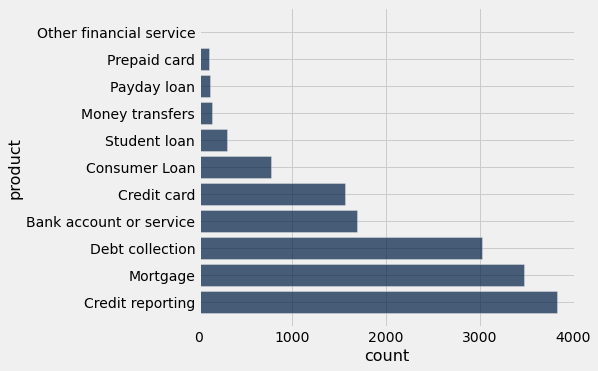

In [6]:
complaints_per_product.sort(1).barh(0,1)

**Question 3.** Make a table of the number of complaints made against each *company*.  Call it `complaints_per_company`.  It should have one row per company and 2 columns: "company" (the name of the company) and "number of complaints" (the number of complaints made against that company).

In [31]:
complaints_per_company =complaints.group("company")
complaints_per_company_RE= complaints_per_company.relabeled(1, "number of complaints")
complaints_per_company_RE.sort(1, descending=True)

company,number of complaints
Equifax,1440
Experian,1240
"TransUnion Intermediate Holdings, Inc.",1034
Wells Fargo & Company,771
Bank of America,769
JPMorgan Chase & Co.,730
Citibank,717
Ocwen,344
Capital One,315
Nationstar Mortgage,269


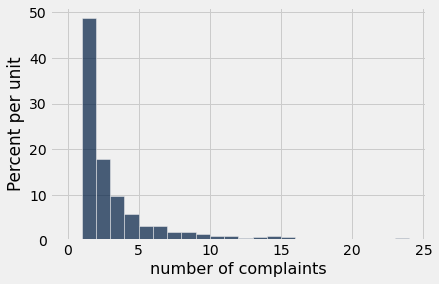

In [44]:
complaints_per_company_RE.hist(1,bins= np.arange(0,25,1))

**Question 4.** It wouldn't be a good idea to make a bar chart of that data.  (Don't try it!)  Why not?

as we can see there are 1141 rows. It may be very hard to read the data if we create a bar chart with 1141 bars.


**Question 5.** Make a bar chart of just the 10 companies with the most complaints. 

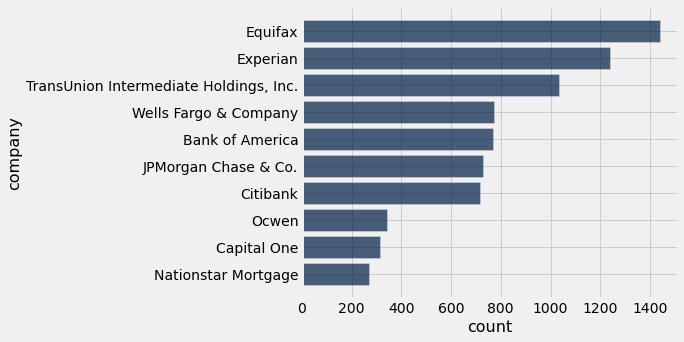

In [166]:
complaints_per_company.sort(1, descending=True).take(np.arange(10)).barh(0,1)

**Question 6.** Make a bar chart like the one above, with one difference: The size of each company's bar should be the *proportion* (among *all complaints* made against any company in `complaints`) that were made against that company.

**Note:** Graphs aren't very useful without accurate labels.  Make sure that the text on the horizontal axis of the graph makes sense.

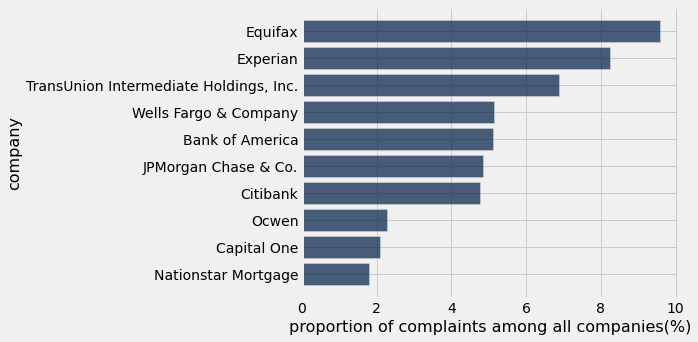

In [182]:
test_q6=complaints_per_company.with_column("proportion of complaints among all companies(%)", (complaints_per_company.column(1)/sum(complaints_per_company.column(1)))*100).sort(2, descending=True).take(np.arange(10)).barh(0,2)
test_q6                                
                                

You've reached the end of homework 3. Don't forget to run all cells before submitting!